In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from BSDE import *
import warnings 
import bokeh
from bokeh.layouts import gridplot
from bokeh.plotting import figure, output_notebook, show, output_file
import time
warnings.filterwarnings("ignore")

In [3]:
T = 0.5
K = 100.
r = 0.04
R = 0.06
p = 1
M = np.eye(p)
S_init = 100.
mu = 0.06
sigma = 0.2
Q = 0

In [4]:
N = 10000
m = 6
RF_n_trees = 200
RF_max_leaf_nodes = 100
M_run = 20
n_picard = 3

In [ ]:
test = BsdeHD(T, K, M, mu, Q, sigma, S_init, r, R)
test.get_price(N, m, option_type='call', option_payoff='geometric',
               oType='European',n_picard=n_picard, RF_n_estimators = 200, RF_max_leaf_nodes=300)

In [ ]:
range_leaf = len(list(range(50, 10000, 50)))
a = np.zeros([range_leaf, 10])
timing = np.zeros_like(a)
for i, leaf in enumerate(list(range(50, 10000, 50))): 
    for j in range(10): 
        test = BsdeHD(T, K, M, mu, Q, sigma, S_init, r, R)
        a[i, j] = round(test.get_price(N, m, option_type='call', option_payoff='geometric',
                                       oType='European',n_picard=n_picard, RF_n_estimators = 200, RF_max_leaf_nodes=leaf), 3)      
    print (a[i])   

In [11]:
u = a.mean(axis=1) - 7.15

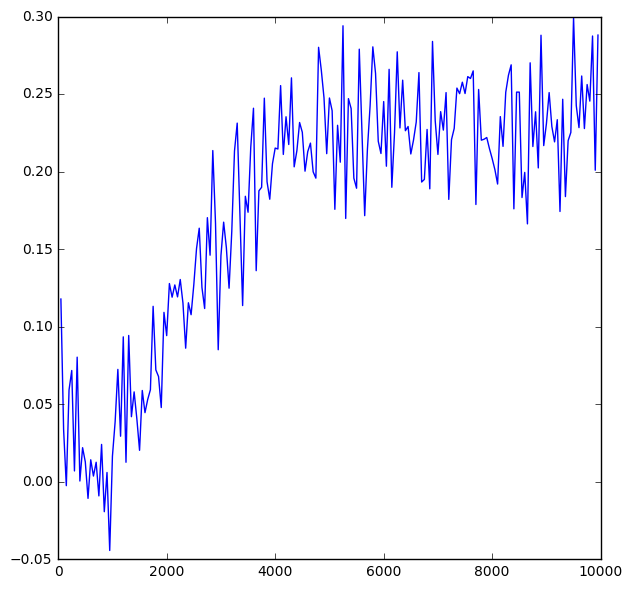

In [13]:
plt.plot(list(range(50, 10000, 50)), u)
plt.show()

In [15]:
import pandas as pd

In [36]:
columns = ["run {}".format(i + 1) for i in range(10)]

In [37]:
index = ["max_leaf_nodes = {}".format(j) for j in list(range(50, 10000, 50))] 

In [38]:
matrix = pd.DataFrame(data=a, columns=columns, index=index)

In [39]:
matrix["mean"]= matrix.mean(axis=1)

In [42]:
matrix["std"] = matrix.std(axis=1)

In [57]:
left = matrix["mean"].values - 1.96 * matrix["std"].values / 10
right = matrix["mean"].values + 1.96 * matrix["std"].values / 10

In [66]:
matrix["95% confidence interval"] = ["[{},{} ]".format(round(left[i], 3), round(right[i], 3)) for i in range(len(matrix))]

In [67]:
matrix

,run 1,run 2,run 3,run 4,run 5,run 6,run 7,run 8,run 9,run 10,mean,std,95% confidence interval
max_leaf_nodes = 50,7.375,7.218,7.126,7.236,7.294,7.349,7.267,7.317,7.207,7.291,7.2680,0.070019,"[7.254,7.282 ]"
max_leaf_nodes = 100,7.104,7.087,7.222,7.172,7.211,7.207,7.172,7.329,7.153,7.181,7.1838,0.063870,"[7.171,7.196 ]"
max_leaf_nodes = 150,7.108,7.211,7.278,7.109,7.326,6.889,7.124,7.092,7.172,7.167,7.1476,0.112873,"[7.125,7.17 ]"
max_leaf_nodes = 200,7.254,7.223,7.183,7.176,7.162,7.265,7.198,7.231,7.145,7.256,7.2093,0.040299,"[7.201,7.217 ]"
max_leaf_nodes = 250,7.259,7.154,7.045,7.369,7.114,7.372,7.280,7.269,7.175,7.182,7.2219,0.101231,"[7.202,7.242 ]"
max_leaf_nodes = 300,7.239,7.194,7.088,7.017,7.128,7.157,7.401,7.065,6.980,7.302,7.1571,0.123955,"[7.133,7.181 ]"
max_leaf_nodes = 350,7.347,7.185,7.152,7.241,7.227,7.246,7.201,7.058,7.341,7.307,7.2305,0.084176,"[7.214,7.247 ]"
max_leaf_nodes = 400,7.220,7.089,7.260,7.054,7.111,7.158,7.076,7.149,7.196,7.193,7.1506,0.064000,"[7.138,7.163 ]"
max_leaf_nodes = 450,7.232,7.000,7.094,7.226,7.173,7.184,7.353,7.160,7.183,7.116,7.1721,0.088595,"[7.155,7.189 ]"
max_leaf_nodes = 500,7.068,7.231,7.223,7.124,7.103,7.251,7.270,7.150,7.212,6.997,7.1629,0.084669,"[7.146,7.179 ]"


In [68]:
matrix.to_csv("price_againt_leafs.csv")

In [ ]:
param = ['q', 'mu', 'R ', 'r ','sigma', 'T', 'K', 'S0']
values = [Q, mu, R, r, sigma, T, K, S0]
dataset = list(zip(param,values))
df_param = pd.DataFrame(data = dataset, columns=['Parameters', 'values'])

In [ ]:
sparam = ['N_particles', 'm_discretization', 'N_run', 'n_picard','Number of trees', 'Max Leaf nodes']
svalues = [N, m, M_run, n_picard, RF_n_trees, RF_max_leaf_nodes]
sp_dataset = list(zip(sparam,svalues))
df_sparam = pd.DataFrame(sp_dataset, columns=['Specific Parameters', 'values'])
df_sparam

In [ ]:
run_id = ["run {}".format(i) for i in range(1, M_run+1)]
df = pd.DataFrame(list(zip(run_id, a, timing)), columns = ['run','values', 'time'])

In [ ]:
min_a = round(df['values'].min(), 4)
max_a = round(df['values'].max(), 4)
mean_a = round(df['values'].mean(), 4)
std_a = round(df['values'].std(), 4)
left = round(mean_a - 1.96 * std_a / M_run, 4)
right = round(mean_a + 1.96 * std_a / M_run, 4)

In [ ]:
stat_param = ['mean', 'std', '95% confidence interval', 'min', 'max']
stat_values = [mean_a, std_a, [left, right], min_a, max_a]
stat_data = list(zip(stat_param, stat_values))
stat_df = pd.DataFrame(stat_data, columns = ['stat parameter', 'values'])
stat_df

In [ ]:
df_join = pd.concat([df_param, df_sparam, df, stat_df], axis = 0)
df_join.to_csv('output_rf.csv')